* Dataset can be found at [Swedish Insurance](https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt)
* More about K-Means clustering at [Linear Regression with Linear Algebra](https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python)

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("swedish_insurance.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


# What does the dataset contain ? 

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


# What is the algorithm

# How does the algorithm work

# Advantages and Disadvantges of the algorithm

# How is it performed on the dataset 

In [4]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


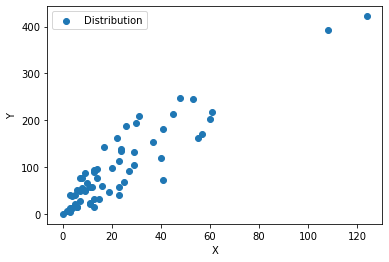

In [5]:
plt.scatter(df['X'], df['Y'], label='Distribution')
plt.xlabel('X')
plt.ylabel("Y")
plt.legend()
plt.show();

In [6]:
X = df.values

In [7]:
train, test = train_test_split(X, random_state=42, test_size=0.3)

In [8]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return np.sqrt(mean_error)

In [9]:
# Calculate the mean value of a list of numbers
def mean(values):
    return np.sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return np.sum([(x-mean)**2 for x in values])

In [10]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Simple linear regression algorithm
def simple_linear_regression(train, test):
    train_preds = []
    test_preds = []
    b0, b1 = coefficients(train)
    for row in train:
        yhat = b0 + b1 * row[0]
        train_preds.append(yhat)
    for row in test:
        yhat = b0 + b1 * row[0]
        test_preds.append(yhat)
    return train_preds, test_preds

In [11]:
train_preds, test_preds = simple_linear_regression(train, test)
train_y = [row[-1] for row in train]
test_y = [row[-1] for row in test]
train_rmse = rmse_metric(train_y, train_preds)
test_rmse = rmse_metric(test_y, test_preds)
print("RMSE on train: {}".format(train_rmse))
print("RMSE on test: {}".format(test_rmse))

RMSE on train: 36.123674251566065
RMSE on test: 36.121762633585256


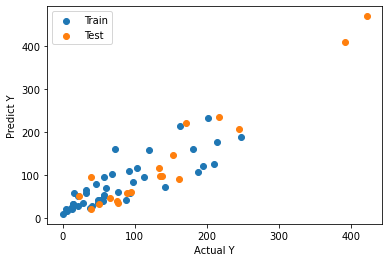

In [12]:
plt.scatter(train_y, train_preds, label="Train")
plt.scatter(test_y, test_preds, label="Test")
plt.xlabel("Actual Y")
plt.ylabel("Predict Y")
plt.legend()
plt.show();

# Summary

* The model fits for both training and testing dataset
* Although the data seems linearly dependent, the variance in the data is resulting in the higher RMSE
* Feature Engineering might help reduce the RMSE